In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Robust_scaller_result.csv",encoding="cp949")

In [3]:
data.head()

,CUSTNO,GNO,CBSCORE,CBSCOREGRD,CREDITOTAMT,YSALEAMT,ESTMM,ASSETAMT,IMSAAMT,IMJUAMT,...,KIND_JOB_K,KIND_JOB_L,KIND_JOB_M,KIND_JOB_N,KIND_JOB_O,KIND_JOB_P,KIND_JOB_Q,KIND_JOB_R,KIND_JOB_S,KIND_JOB_T
0,475821,l180202101898,1.015873,-0.5,0.230769,10.743169,0.014085,-0.176471,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,74417,l230201700120,0.206349,0.0,0.205128,6.027322,-0.380282,-0.088235,-0.5,25.0,...,0,0,0,0,0,0,0,0,0,0
2,387787,l110201603233,0.396825,-0.5,-0.282051,3.775956,2.098592,-0.176471,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,395418,l230201700254,0.000000,0.0,0.076923,3.562842,-0.352113,-0.176471,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,190372,l200201601418,-2.476190,2.0,-0.102564,1.437158,1.845070,0.235294,-0.4,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.columns

Index(['CUSTNO', 'GNO', 'CBSCORE', 'CBSCOREGRD', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'ASSETAMT', 'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'BIZNML_x', 'LABORCNT', 'ACTCD', 'KOSPI', '환율',
       'GDP', '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률', '소비자심리지수',
       'KIND_JOB', 'KIND_JOB_A', 'KIND_JOB_B', 'KIND_JOB_C', 'KIND_JOB_D',
       'KIND_JOB_E', 'KIND_JOB_F', 'KIND_JOB_G', 'KIND_JOB_H', 'KIND_JOB_I',
       'KIND_JOB_J', 'KIND_JOB_K', 'KIND_JOB_L', 'KIND_JOB_M', 'KIND_JOB_N',
       'KIND_JOB_O', 'KIND_JOB_P', 'KIND_JOB_Q', 'KIND_JOB_R', 'KIND_JOB_S',
       'KIND_JOB_T'],
      dtype='object')

In [5]:
features = data[['CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM',  'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'LABORCNT', 'KOSPI', '환율', 'GDP', 
        '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수','KIND_JOB_A', 'KIND_JOB_B', 'KIND_JOB_C', 'KIND_JOB_D',
       'KIND_JOB_E', 'KIND_JOB_F', 'KIND_JOB_G', 'KIND_JOB_H', 'KIND_JOB_I',
       'KIND_JOB_J', 'KIND_JOB_K', 'KIND_JOB_L', 'KIND_JOB_M', 'KIND_JOB_N',
       'KIND_JOB_O', 'KIND_JOB_P', 'KIND_JOB_Q', 'KIND_JOB_R', 'KIND_JOB_S',
       'KIND_JOB_T']]
act = data['ACTCD']

#BorderlineSMOTE 기법 활용

In [6]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split

In [7]:

train_x, test_x,train_y, test_y = train_test_split(features, act,
stratify=act,train_size=0.7,test_size=0.3,random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(27381, 40) (11736, 40) (27381,) (11736,)


In [8]:
sm = BorderlineSMOTE(random_state=42)
over_train_x, over_train_y = sm.fit_resample(train_x,train_y)
'''
over_train_x : 학습용 독립변수
over_train_y : 학습용 종속변수
'''

'\nover_train_x : 학습용 독립변수\nover_train_y : 학습용 종속변수\n'

In [9]:
from sklearn.neighbors import KNeighborsClassifier

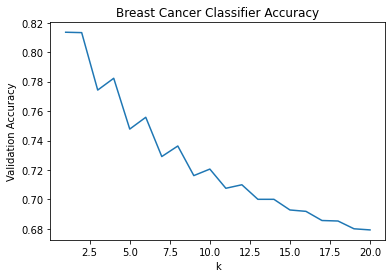

0.8135650988411725


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_BOST = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='distance')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y,)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    matrix_kd_tree_uniform_BOST.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()    
print(max(accuracies))

In [11]:
sorted(matrix_kd_tree_uniform_BOST,key= lambda x: x[3],reverse=True)

[(1,
  0.22022022022022023,
  0.411214953271028,
  0.28683181225554105,
  0.6325716618970929,
  0.8135650988411725,
  array([[9108, 1558],
         [ 630,  440]], dtype=int64)),
 (2,
  0.21763224181360202,
  0.40373831775700936,
  0.2828150572831424,
  0.6290677337894366,
  0.8133094751192911,
  array([[9113, 1553],
         [ 638,  432]], dtype=int64)),
 (4,
  0.2009665726943214,
  0.4663551401869159,
  0.2808893892485224,
  0.6401717572301541,
  0.782293796864349,
  array([[8682, 1984],
         [ 571,  499]], dtype=int64)),
 (6,
  0.18970283344851416,
  0.5130841121495328,
  0.27699293642785067,
  0.6466133105281697,
  0.7557941376959781,
  array([[8321, 2345],
         [ 521,  549]], dtype=int64)),
 (3,
  0.19339805825242717,
  0.4654205607476635,
  0.27325102880658436,
  0.6353448200325604,
  0.7742842535787321,
  array([[8589, 2077],
         [ 572,  498]], dtype=int64)),
 (5,
  0.18520986009327114,
  0.5196261682242991,
  0.2730844793713163,
  0.6451496676486206,
  0.74778459441

In [12]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 1,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))


              precision    recall  f1-score   support

        사고보증       0.94      0.85      0.89     10666
        정상보증       0.22      0.41      0.29      1070

    accuracy                           0.81     11736
   macro avg       0.58      0.63      0.59     11736
weighted avg       0.87      0.81      0.84     11736



# Edited Nearest Neighbours

In [13]:
from imblearn.under_sampling import EditedNearestNeighbours

In [14]:
enn = EditedNearestNeighbours()
over_train_x,over_train_y = enn.fit_resample(train_x,train_y)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

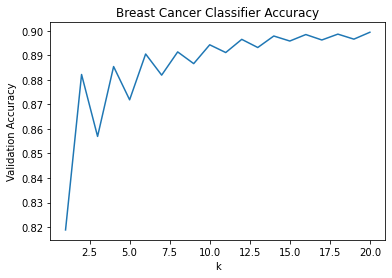

0.8993694614860259


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_ENN = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_ENN.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()    
print(max(accuracies))

In [17]:
matrix_kd_tree_uniform_ENN

[(1,
  0.22699069286452947,
  0.4102803738317757,
  0.29227696404793607,
  0.6350576817593157,
  0.8188479890933879,
  array([[9171, 1495],
         [ 631,  439]], dtype=int64)),
 (2,
  0.3103030303030303,
  0.23925233644859814,
  0.27018469656992083,
  0.5929526261279181,
  0.8821574642126789,
  array([[10097,   569],
         [  814,   256]], dtype=int64)),
 (3,
  0.25264012997562957,
  0.2906542056074766,
  0.27031725336810086,
  0.6021994073227708,
  0.8569359236537151,
  array([[9746,  920],
         [ 759,  311]], dtype=int64)),
 (4,
  0.2907153729071537,
  0.17850467289719626,
  0.22119281991893455,
  0.5674072211288906,
  0.8853953646898433,
  array([[10200,   466],
         [  879,   191]], dtype=int64)),
 (5,
  0.26206140350877194,
  0.22336448598130842,
  0.2411705348133199,
  0.580133396187729,
  0.8718473074301295,
  array([[9993,  673],
         [ 831,  239]], dtype=int64)),
 (6,
  0.29206963249516443,
  0.1411214953271028,
  0.19029615626969126,
  0.5534034253309056,
  0

In [18]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.86      0.90     10666
        정상보증       0.23      0.41      0.29      1070

    accuracy                           0.82     11736
   macro avg       0.58      0.64      0.59     11736
weighted avg       0.87      0.82      0.84     11736



In [19]:
from imblearn.over_sampling import ADASYN


In [20]:
ADA = ADASYN(random_state=42,)
over_train_x,over_train_y = ADA.fit_resample(train_x,train_y)
from sklearn.neighbors import KNeighborsClassifier

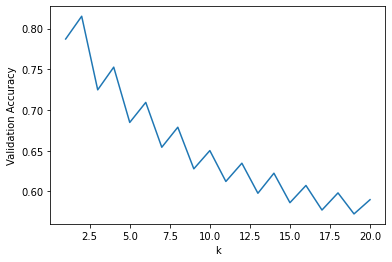

0.8151840490797546


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_ADA = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_ADA.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [22]:
matrix_kd_tree_uniform_ADA

[(1,
  0.19547588561673068,
  0.4280373831775701,
  0.2683855845297392,
  0.6256537937826722,
  0.7872358554873893,
  array([[8781, 1885],
         [ 612,  458]], dtype=int64)),
 (2,
  0.21660649819494585,
  0.3925233644859813,
  0.27916251246261214,
  0.6250541067695236,
  0.8151840490797546,
  array([[9147, 1519],
         [ 650,  420]], dtype=int64)),
 (3,
  0.17073170731707318,
  0.5233644859813084,
  0.2574712643678161,
  0.6341742737425763,
  0.7247784594410361,
  array([[7946, 2720],
         [ 510,  560]], dtype=int64)),
 (4,
  0.18210197710718,
  0.49065420560747663,
  0.2656210473058437,
  0.6347889441688236,
  0.7526414451261078,
  array([[8308, 2358],
         [ 545,  525]], dtype=int64)),
 (5,
  0.16090768437338834,
  0.5831775700934579,
  0.25222312045270817,
  0.6390480012477415,
  0.6847307430129516,
  array([[7412, 3254],
         [ 446,  624]], dtype=int64)),
 (6,
  0.16756603237716558,
  0.5514018691588785,
  0.25702461337399257,
  0.6383017221286611,
  0.70935582822

In [23]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.93      0.82      0.88     10666
        정상보증       0.20      0.43      0.27      1070

    accuracy                           0.79     11736
   macro avg       0.57      0.63      0.57     11736
weighted avg       0.87      0.79      0.82     11736



In [24]:
from imblearn.combine import SMOTEENN

SMT = SMOTEENN(random_state=42)
over_train_x,over_train_y = SMT.fit_resample(train_x,train_y)

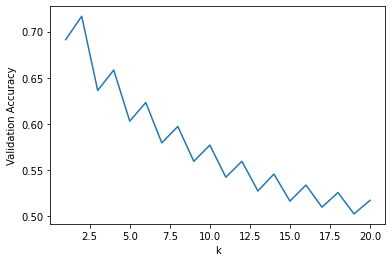

0.7166837082481254


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_SMTEN = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_SMTEN.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [26]:
matrix_kd_tree_uniform_SMTEN

[(1,
  0.16221222545646996,
  0.5728971962616822,
  0.2528356362136523,
  0.638033072160468,
  0.6912917518745739,
  array([[7500, 3166],
         [ 457,  613]], dtype=int64)),
 (2,
  0.17309365033342997,
  0.5579439252336449,
  0.26421774728922326,
  0.645276106625823,
  0.7166837082481254,
  array([[7814, 2852],
         [ 473,  597]], dtype=int64)),
 (3,
  0.15160095839686344,
  0.6504672897196262,
  0.24589295177530476,
  0.6426441080137603,
  0.6362474437627812,
  array([[6771, 3895],
         [ 374,  696]], dtype=int64)),
 (4,
  0.1573793425040802,
  0.6308411214953271,
  0.2519126702743049,
  0.6460037221952539,
  0.6584014996591684,
  array([[7052, 3614],
         [ 395,  675]], dtype=int64)),
 (5,
  0.14696045642337202,
  0.6981308411214954,
  0.24280838615309605,
  0.6458027166417528,
  0.6030163599182005,
  array([[6330, 4336],
         [ 323,  747]], dtype=int64)),
 (6,
  0.15228215767634853,
  0.685981308411215,
  0.2492359932088285,
  0.6514474327542668,
  0.6232106339468

In [27]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.70      0.81     10666
        정상보증       0.16      0.57      0.25      1070

    accuracy                           0.69     11736
   macro avg       0.55      0.64      0.53     11736
weighted avg       0.87      0.69      0.76     11736



In [28]:
from imblearn.combine import SMOTETomek

SMT = SMOTETomek(random_state=42)
over_train_x,over_train_y = SMT.fit_resample(train_x,train_y)

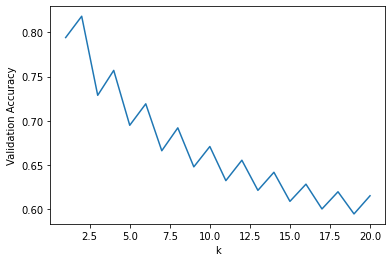

0.8182515337423313


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_SMTTK = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_SMTTK.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [30]:
matrix_kd_tree_uniform_SMTTK

[(1,
  0.20273851590106007,
  0.4289719626168224,
  0.27534493101379726,
  0.6298713178919477,
  0.7941376959781867,
  array([[8861, 1805],
         [ 611,  459]], dtype=int64)),
 (2,
  0.2207041513399895,
  0.3925233644859813,
  0.28254288597376387,
  0.6267417122448659,
  0.8182515337423313,
  array([[9183, 1483],
         [ 650,  420]], dtype=int64)),
 (3,
  0.17158843643145788,
  0.5158878504672897,
  0.2575227431770469,
  0.6330142421284508,
  0.7287832310838446,
  array([[8001, 2665],
         [ 518,  552]], dtype=int64)),
 (4,
  0.18314366998577525,
  0.48130841121495327,
  0.26532715095311693,
  0.6329756006946696,
  0.7569870483980914,
  array([[8369, 2297],
         [ 555,  515]], dtype=int64)),
 (5,
  0.16475300400534046,
  0.5766355140186916,
  0.25628245067497407,
  0.6416835923740561,
  0.6948704839809134,
  array([[7538, 3128],
         [ 453,  617]], dtype=int64)),
 (6,
  0.171875,
  0.5448598130841121,
  0.26131779471089195,
  0.6407498015354931,
  0.7191547375596455,


In [31]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.83      0.88     10666
        정상보증       0.20      0.43      0.28      1070

    accuracy                           0.79     11736
   macro avg       0.57      0.63      0.58     11736
weighted avg       0.87      0.79      0.83     11736



In [32]:
from imblearn.under_sampling import TomekLinks


In [33]:
ADA = TomekLinks()
over_train_x,over_train_y = ADA.fit_resample(train_x,train_y)
from sklearn.neighbors import KNeighborsClassifier

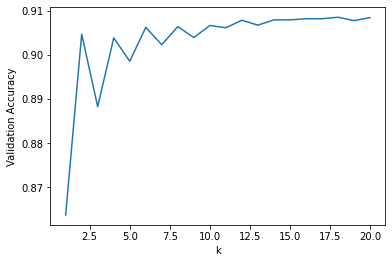

0.9084867075664622


In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_Tomek = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_ADA.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [35]:
sorted(matrix_kd_tree_uniform_ADA,key=lambda x: x[3],reverse=True)

[(1,
  0.28420195439739415,
  0.32616822429906545,
  0.3037423846823325,
  0.6218784117932605,
  0.863667348329925,
  array([[9787,  879],
         [ 721,  349]], dtype=int64)),
 (2,
  0.21660649819494585,
  0.3925233644859813,
  0.27916251246261214,
  0.6250541067695236,
  0.8151840490797546,
  array([[9147, 1519],
         [ 650,  420]], dtype=int64)),
 (1,
  0.19547588561673068,
  0.4280373831775701,
  0.2683855845297392,
  0.6256537937826722,
  0.7872358554873893,
  array([[8781, 1885],
         [ 612,  458]], dtype=int64)),
 (4,
  0.18210197710718,
  0.49065420560747663,
  0.2656210473058437,
  0.6347889441688236,
  0.7526414451261078,
  array([[8308, 2358],
         [ 545,  525]], dtype=int64)),
 (3,
  0.17073170731707318,
  0.5233644859813084,
  0.2574712643678161,
  0.6341742737425763,
  0.7247784594410361,
  array([[7946, 2720],
         [ 510,  560]], dtype=int64)),
 (6,
  0.16756603237716558,
  0.5514018691588785,
  0.25702461337399257,
  0.6383017221286611,
  0.709355828220

In [36]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.93      0.92      0.92     10666
        정상보증       0.28      0.32      0.30      1070

    accuracy                           0.86     11736
   macro avg       0.61      0.62      0.61     11736
weighted avg       0.87      0.86      0.87     11736



In [37]:
sorted(matrix_kd_tree_uniform_BOST,key=lambda x: x[3],reverse=True)

[(1,
  0.22022022022022023,
  0.411214953271028,
  0.28683181225554105,
  0.6325716618970929,
  0.8135650988411725,
  array([[9108, 1558],
         [ 630,  440]], dtype=int64)),
 (2,
  0.21763224181360202,
  0.40373831775700936,
  0.2828150572831424,
  0.6290677337894366,
  0.8133094751192911,
  array([[9113, 1553],
         [ 638,  432]], dtype=int64)),
 (4,
  0.2009665726943214,
  0.4663551401869159,
  0.2808893892485224,
  0.6401717572301541,
  0.782293796864349,
  array([[8682, 1984],
         [ 571,  499]], dtype=int64)),
 (6,
  0.18970283344851416,
  0.5130841121495328,
  0.27699293642785067,
  0.6466133105281697,
  0.7557941376959781,
  array([[8321, 2345],
         [ 521,  549]], dtype=int64)),
 (3,
  0.19339805825242717,
  0.4654205607476635,
  0.27325102880658436,
  0.6353448200325604,
  0.7742842535787321,
  array([[8589, 2077],
         [ 572,  498]], dtype=int64)),
 (5,
  0.18520986009327114,
  0.5196261682242991,
  0.2730844793713163,
  0.6451496676486206,
  0.74778459441

In [38]:
sorted(matrix_kd_tree_uniform_ENN,key=lambda x: x[3],reverse=True)

[(1,
  0.22699069286452947,
  0.4102803738317757,
  0.29227696404793607,
  0.6350576817593157,
  0.8188479890933879,
  array([[9171, 1495],
         [ 631,  439]], dtype=int64)),
 (3,
  0.25264012997562957,
  0.2906542056074766,
  0.27031725336810086,
  0.6021994073227708,
  0.8569359236537151,
  array([[9746,  920],
         [ 759,  311]], dtype=int64)),
 (2,
  0.3103030303030303,
  0.23925233644859814,
  0.27018469656992083,
  0.5929526261279181,
  0.8821574642126789,
  array([[10097,   569],
         [  814,   256]], dtype=int64)),
 (5,
  0.26206140350877194,
  0.22336448598130842,
  0.2411705348133199,
  0.580133396187729,
  0.8718473074301295,
  array([[9993,  673],
         [ 831,  239]], dtype=int64)),
 (4,
  0.2907153729071537,
  0.17850467289719626,
  0.22119281991893455,
  0.5674072211288906,
  0.8853953646898433,
  array([[10200,   466],
         [  879,   191]], dtype=int64)),
 (7,
  0.27167630057803466,
  0.17570093457943925,
  0.2133938706015891,
  0.5642239906349287,
  0

In [39]:
sorted(matrix_kd_tree_uniform_ADA,key=lambda x: x[3],reverse=True)

[(1,
  0.28420195439739415,
  0.32616822429906545,
  0.3037423846823325,
  0.6218784117932605,
  0.863667348329925,
  array([[9787,  879],
         [ 721,  349]], dtype=int64)),
 (2,
  0.21660649819494585,
  0.3925233644859813,
  0.27916251246261214,
  0.6250541067695236,
  0.8151840490797546,
  array([[9147, 1519],
         [ 650,  420]], dtype=int64)),
 (1,
  0.19547588561673068,
  0.4280373831775701,
  0.2683855845297392,
  0.6256537937826722,
  0.7872358554873893,
  array([[8781, 1885],
         [ 612,  458]], dtype=int64)),
 (4,
  0.18210197710718,
  0.49065420560747663,
  0.2656210473058437,
  0.6347889441688236,
  0.7526414451261078,
  array([[8308, 2358],
         [ 545,  525]], dtype=int64)),
 (3,
  0.17073170731707318,
  0.5233644859813084,
  0.2574712643678161,
  0.6341742737425763,
  0.7247784594410361,
  array([[7946, 2720],
         [ 510,  560]], dtype=int64)),
 (6,
  0.16756603237716558,
  0.5514018691588785,
  0.25702461337399257,
  0.6383017221286611,
  0.709355828220

In [40]:
sorted(matrix_kd_tree_uniform_SMTEN,key=lambda x: x[3],reverse=True)

[(2,
  0.17309365033342997,
  0.5579439252336449,
  0.26421774728922326,
  0.645276106625823,
  0.7166837082481254,
  array([[7814, 2852],
         [ 473,  597]], dtype=int64)),
 (1,
  0.16221222545646996,
  0.5728971962616822,
  0.2528356362136523,
  0.638033072160468,
  0.6912917518745739,
  array([[7500, 3166],
         [ 457,  613]], dtype=int64)),
 (4,
  0.1573793425040802,
  0.6308411214953271,
  0.2519126702743049,
  0.6460037221952539,
  0.6584014996591684,
  array([[7052, 3614],
         [ 395,  675]], dtype=int64)),
 (6,
  0.15228215767634853,
  0.685981308411215,
  0.2492359932088285,
  0.6514474327542668,
  0.6232106339468303,
  array([[6580, 4086],
         [ 336,  734]], dtype=int64)),
 (3,
  0.15160095839686344,
  0.6504672897196262,
  0.24589295177530476,
  0.6426441080137603,
  0.6362474437627812,
  array([[6771, 3895],
         [ 374,  696]], dtype=int64)),
 (8,
  0.1470758540822235,
  0.7121495327102804,
  0.24380099184130538,
  0.648921194256884,
  0.597222222222222

In [41]:
sorted(matrix_kd_tree_uniform_SMTTK,key=lambda x: x[3],reverse=True)

[(2,
  0.2207041513399895,
  0.3925233644859813,
  0.28254288597376387,
  0.6267417122448659,
  0.8182515337423313,
  array([[9183, 1483],
         [ 650,  420]], dtype=int64)),
 (1,
  0.20273851590106007,
  0.4289719626168224,
  0.27534493101379726,
  0.6298713178919477,
  0.7941376959781867,
  array([[8861, 1805],
         [ 611,  459]], dtype=int64)),
 (4,
  0.18314366998577525,
  0.48130841121495327,
  0.26532715095311693,
  0.6329756006946696,
  0.7569870483980914,
  array([[8369, 2297],
         [ 555,  515]], dtype=int64)),
 (6,
  0.171875,
  0.5448598130841121,
  0.26131779471089195,
  0.6407498015354931,
  0.7191547375596455,
  array([[7857, 2809],
         [ 487,  583]], dtype=int64)),
 (8,
  0.16557161629434955,
  0.5887850467289719,
  0.25846153846153846,
  0.6455550960252773,
  0.6919734151329243,
  array([[7491, 3175],
         [ 440,  630]], dtype=int64)),
 (3,
  0.17158843643145788,
  0.5158878504672897,
  0.2575227431770469,
  0.6330142421284508,
  0.7287832310838446,
